In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [27]:
import numpy as np

In [28]:
import seaborn as sns

In [36]:
sns.set_style("whitegrid")

In [37]:
data = {
    'Product': ['Shirt', 'Pants', 'Shoes', 'Shirt', 'Shoes', 'Pants', 'Shirt', 'Shoes'],
    'Price': [600, 700, 800, 900, 1100, 750, 1200, 1250],
    'Quantity': [5, 3, 2, 4, 1, 5, 2, 3],
    'Date': pd.date_range(start='2025-05-01', periods=8, freq='D')
}
df = pd.DataFrame(data)

In [38]:
print("First 5 Rows of Dataset:")
print(df.head())

First 5 Rows of Dataset:
  Product  Price  Quantity       Date
0   Shirt    600         5 2025-05-01
1   Pants    700         3 2025-05-02
2   Shoes    800         2 2025-05-03
3   Shirt    900         4 2025-05-04
4   Shoes   1100         1 2025-05-05


In [39]:
df['Total_Sales'] = df['Price'] * df['Quantity']

In [40]:
print("\nDescriptive Stats:")
print(df.describe())


Descriptive Stats:
             Price  Quantity                 Date  Total_Sales
count     8.000000  8.000000                    8     8.000000
mean    912.500000  3.125000  2025-05-04 12:00:00  2662.500000
min     600.000000  1.000000  2025-05-01 00:00:00  1100.000000
25%     737.500000  2.000000  2025-05-02 18:00:00  1975.000000
50%     850.000000  3.000000  2025-05-04 12:00:00  2700.000000
75%    1125.000000  4.250000  2025-05-06 06:00:00  3637.500000
max    1250.000000  5.000000  2025-05-08 00:00:00  3750.000000
std     243.119606  1.457738                  NaN  1022.165069


In [41]:
product_sales = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product:")
print(product_sales)


Total Sales by Product:
Product
Shirt    9000
Shoes    6450
Pants    5850
Name: Total_Sales, dtype: int64


/tmp/ipython-input-56-995019481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=product_sales.index, y=product_sales.values, palette=colors)


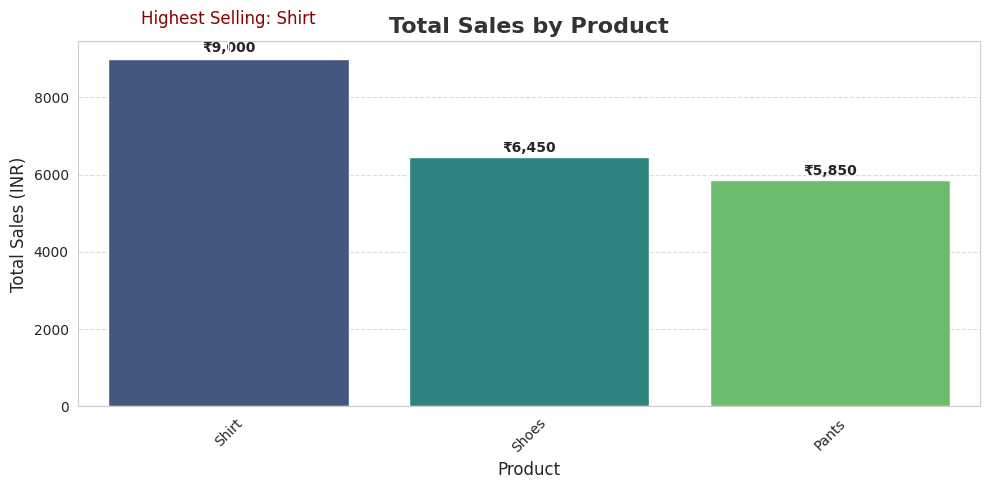

In [56]:
plt.figure(figsize=(10, 5))
colors = sns.color_palette("viridis", len(product_sales))
barplot = sns.barplot(x=product_sales.index, y=product_sales.values, palette=colors)
for i, value in enumerate(product_sales.values):
    barplot.text(i, value + (0.01 * value), f'₹{int(value):,}', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Total Sales by Product', fontsize=16, fontweight='bold', color='#333',)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

top_product = product_sales.index[0]
top_value = product_sales.iloc[0]
plt.annotate(f"Highest Selling: {top_product}",
             xy=(0, top_value),
             xytext=(0, top_value + top_value * 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             ha='center',
             fontsize=12,
             color='darkred')

plt.tight_layout()
plt.show()


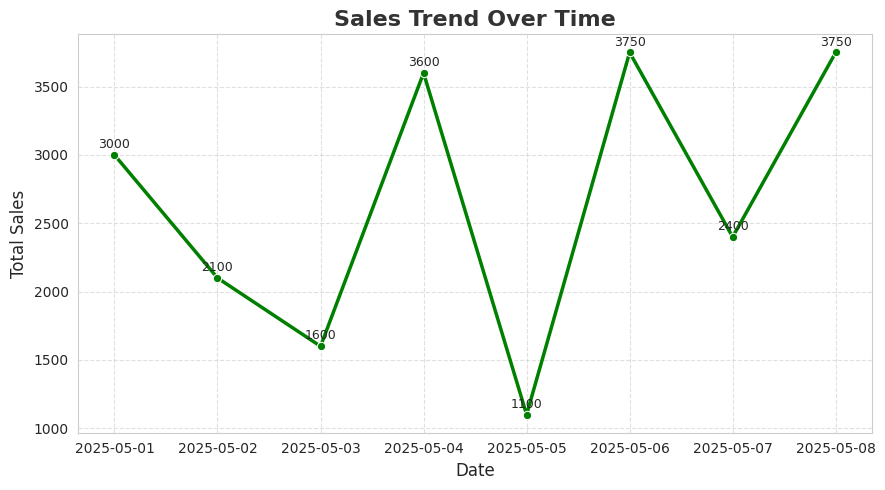

In [61]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=df, x='Date', y='Total_Sales', marker='o', color='green', linewidth=2.5)
plt.title('Sales Trend Over Time', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
for x, y in zip(df['Date'], df['Total_Sales']):
    plt.text(x, y + 50, f'{int(y)}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [62]:
top_quantity = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
print("Most Sold Products by Quantity:\n", top_quantity)

Most Sold Products by Quantity:
 Product
Shirt    11
Pants     8
Shoes     6
Name: Quantity, dtype: int64


In [63]:
avg_sales = df['Total_Sales'].mean()
print(f"\nAverage Sale Value per Transaction: ₹{avg_sales:.2f}")


Average Sale Value per Transaction: ₹2662.50


In [64]:
daily_sales = df.groupby('Date')['Total_Sales'].sum()
print("\nDaily Total Sales:\n", daily_sales)


Daily Total Sales:
 Date
2025-05-01    3000
2025-05-02    2100
2025-05-03    1600
2025-05-04    3600
2025-05-05    1100
2025-05-06    3750
2025-05-07    2400
2025-05-08    3750
Name: Total_Sales, dtype: int64


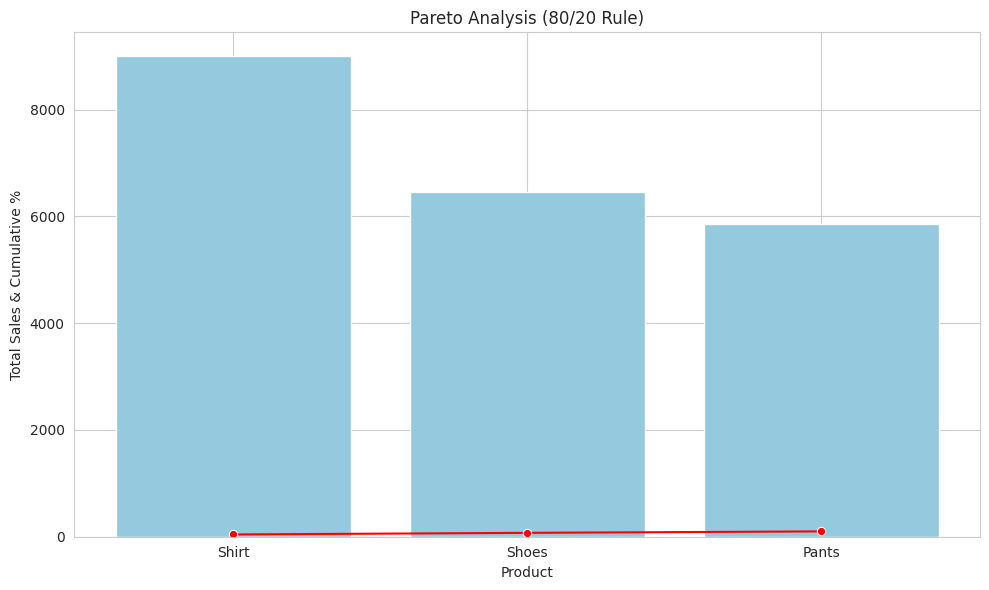

In [69]:
# Calculate cumulative sales %
pareto_df = product_sales.reset_index()
pareto_df['Cumulative_Sales'] = pareto_df['Total_Sales'].cumsum()
pareto_df['Cumulative_Percent'] = 100 * pareto_df['Cumulative_Sales'] / pareto_df['Total_Sales'].sum()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=pareto_df, x='Product', y='Total_Sales', color='skyblue')
sns.lineplot(data=pareto_df, x='Product', y='Cumulative_Percent', color='red', marker='o')
plt.title('Pareto Analysis (80/20 Rule)')
plt.ylabel('Total Sales & Cumulative %')
plt.grid(True)
plt.tight_layout()
plt.show()

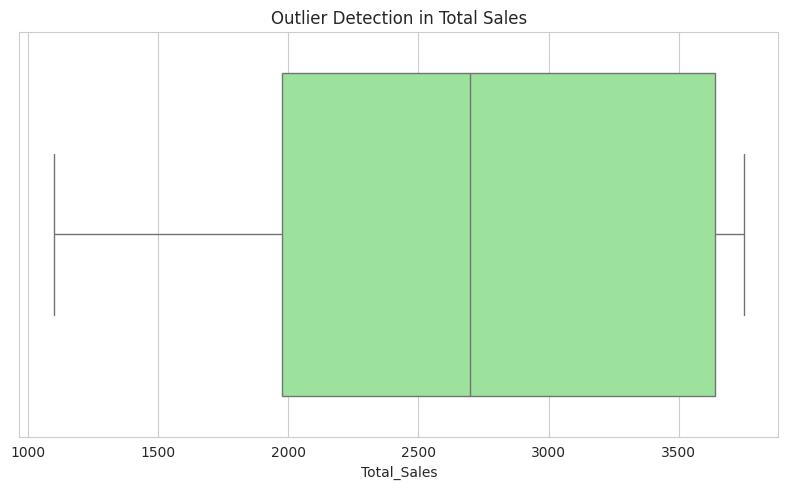

In [70]:
# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Total_Sales'], color='lightgreen')
plt.title('Outlier Detection in Total Sales')
plt.tight_layout()
plt.show()